<a href="https://colab.research.google.com/github/sanganalasya-hash/Data-Science/blob/main/Copy_of_Unit5Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator

**You** need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U5proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU5proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU5proj.ipynb"

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generalized linear model structure built with pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated heirearchical glm. **Find a data set that interests you, and apply the simplest model that captures the patterns in the data.**

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit5NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


# **Context**
I wanted to look at a data set that had a linear relationship, so I found this diabetes data set with multiple variables. I chose BMI and Blood Pressure because I initially thought they would have the most linear relationshiop since I thought BMI could predict your blood pressure.

CITE: I used google gemini to fix my code when I got errors.

In [ ]:
#load the data from my github page.
url_bt = 'https://raw.githubusercontent.com/sanganalasya-hash/Data-Science/refs/heads/main/diabetes%5B1%5D.csv'

# Define the columns you want to include
columns_to_load = ['BMI', 'BloodPressure']

# Read the CSV file, including only the specified columns and setting 'Pos' as categorical
df = pd.read_csv(url_bt, usecols=columns_to_load, dtype={'Age':'category'})

# Assign the loaded data to bt_data
bt_data = df

In [ ]:
bt_data

,BMI,Age
0,33.6,50
1,26.6,31
2,23.3,32
3,28.1,21
4,43.1,33
...,...,...
763,32.9,63
764,36.8,27
765,26.2,30
766,30.1,47


<Axes: xlabel='BMI', ylabel='BloodPressure'>

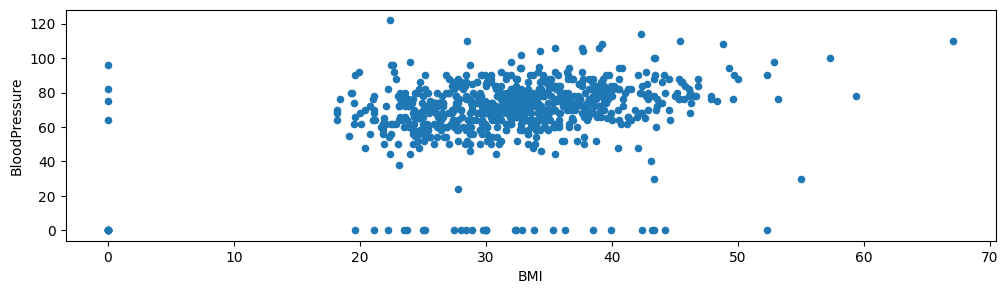

In [ ]:
#scatter plot of Height v. Weight count of the howell data set
bt_data.plot(x="BMI", y="BloodPressure", figsize=(12, 3), kind="scatter")

# **Priors & Data**
The data ended up not having the most linear relationship. In fact, it likely has no real linear relationship, but I still stuck to this data set because I thought the scatter plot looks cool. It has a lot of outliers which I thought made it interesting. For my priors, I chose normal priors because I thought it didn't have too many distinctive skews so the normal distribution would be the best one in this case.

In [ ]:
with pm.Model() as model_lb:

    #priors for the linear part of our model
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=50)

    #this is the linear part of our model
    μ = pm.Deterministic("μ", α + β * bt_data['BMI'])

    #prior for the standard deviation of our likelihood
    #Cauchy is a T dist with nu = 1
    σ = pm.HalfCauchy("σ", 10)

    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=bt_data['BloodPressure'])

    #inference data object
    idata_lb = pm.sample()

Text(0, 0.5, 'BloodPressure')

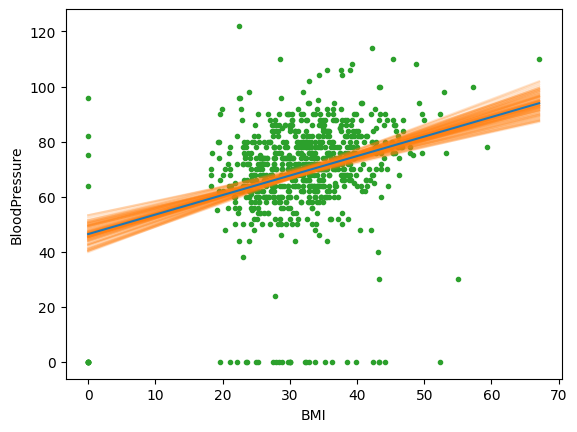

In [ ]:
#grabs 100 posterior samples
posterior = az.extract(idata_lb, num_samples=100)

# grabbing x values for graphing.
x_plot = xr.DataArray(
    np.linspace(bt_data['BMI'].min(), bt_data['BMI'].max(), 50),
    dims="plot_id"
    )

# this creates the expected line, the path we predict temperature and
#rented bike count deviates from
mean_line = posterior["α"].mean() + posterior["β"].mean() * x_plot

#These are a 50 lines that our model came up with
lines = posterior["α"] + posterior["β"] * x_plot

#set up plot
_, ax = plt.subplots()

#plots 50 other lines our model came up with.
ax.plot(x_plot, lines.T, c="C1", alpha=0.2, label="lines")

#plots the mean line
ax.plot(x_plot, mean_line, c="C0", label="mean line")

#plot the raw data
ax.plot(bt_data['BMI'], bt_data['BloodPressure'], "C2.", zorder=-3)

#label axes and create legend
ax.set_xlabel("BMI")
ax.set_ylabel("BloodPressure")

In [ ]:
pm.sample_posterior_predictive(idata_lb, model=model_lb,  extend_inferencedata=True)

<Axes: xlabel='y_pred'>

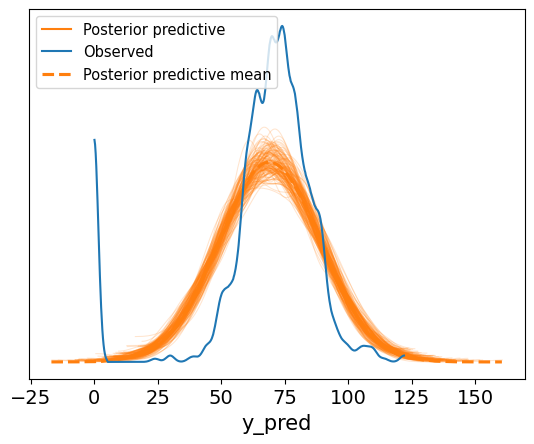

In [ ]:
az.plot_ppc(idata_lb, num_pp_samples=150, colors=["C1", "C0", "C1"])

# **Likelihoods & Posterior**
So the the normal likelihood clearly wasn't the best for this data set. For one, it doesn't account for a lot of outliers on the left which makes it left skewed and the posterior predictive doesn't account for the long, narrow peak of my data. Therefore, when trying again, I decided to try a student T. I though it would be the next best step to account for the skew in my data.

In [ ]:
with pm.Model() as model_sqrtlb:

    #priors for our mean line
    α = pm.Normal("α", sigma=10)
    β = pm.Normal("β", sigma=10)

    #mean line
    μ = pm.Deterministic("μ", α + β * pm.math.sqrt(bt_data['BMI']))

    #prior for standard deviation
    σ = pm.HalfNormal("σ", sigma = 10)

    # Prior for degrees of freedom for Student's T distribution
    nu = pm.HalfCauchy("nu", beta=10) # 'nu' must be > 0

    #normal likelihood
    y_pred = pm.StudentT("y_pred", mu=μ, sigma=σ, nu=nu, observed=bt_data['BloodPressure'])

    idata_sqrtlb = pm.sample()

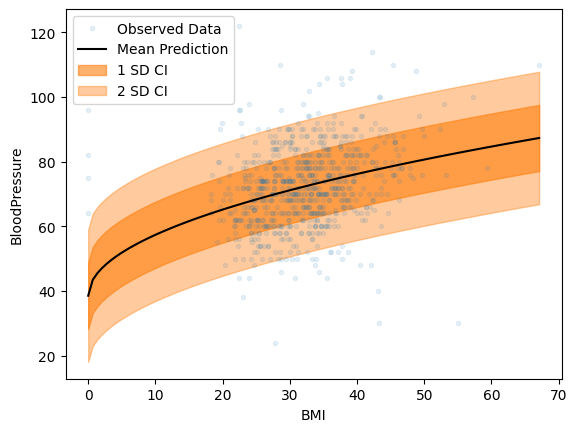

In [ ]:
# Plots the posterior predictive for model_sqrtlb (StudentT likelihood)

_, ax = plt.subplots()

# Plot raw data
ax.plot(bt_data['BMI'], bt_data['BloodPressure'], "C0.", alpha=0.1, label="Observed Data")

# Extract posterior samples from idata_sqrtlb
posterior_sqrtlb = az.extract(idata_sqrtlb)

# Create a range of x-values for plotting the model fit
x_plot = np.linspace(bt_data['BMI'].min(), bt_data['BMI'].max(), 100)

# Calculate mean prediction for μ = α + β * sqrt(BMI)
# Convert scalar DataArray means to Python scalars using .item()
alpha_mean_scalar = posterior_sqrtlb["α"].mean().item()
beta_mean_scalar = posterior_sqrtlb["β"].mean().item()
μ_m_mean = alpha_mean_scalar + beta_mean_scalar * np.sqrt(x_plot)

# Get the mean of the standard deviation from the posterior for StudentT model
sigma_mean_scalar = posterior_sqrtlb["σ"].mean().item()

# Plot the mean line
ax.plot(x_plot, μ_m_mean, c="k", label="Mean Prediction")

# Plot 1 and 2 standard deviation credible intervals around the mean prediction
ax.fill_between(x_plot, μ_m_mean - 1 * sigma_mean_scalar, μ_m_mean + 1 * sigma_mean_scalar, alpha=0.6, color="C1", label="1 SD CI")
ax.fill_between(x_plot, μ_m_mean - 2 * sigma_mean_scalar, μ_m_mean + 2 * sigma_mean_scalar, alpha=0.4, color="C1", label="2 SD CI")

ax.set_xlabel("BMI")
ax.set_ylabel("BloodPressure")
ax.legend()

In [ ]:
pm.sample_posterior_predictive(
    idata_sqrtlb, model = model_sqrtlb, extend_inferencedata=True
    )

<Axes: xlabel='y_pred'>

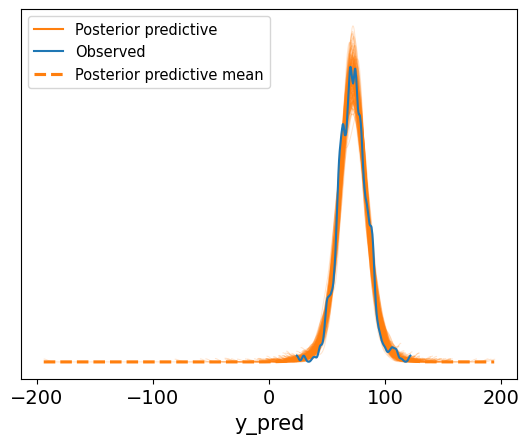

In [ ]:
az.plot_ppc(idata_sqrtlb, num_pp_samples=200, colors=["C1", "C0", "C1"])

# **Likelihoods & Posterior (part 2)**
It suprsingly worked really well? The shape matches my data really well and accounts for the skew and long narrow peak of my data really well. I decided to stop here because I thought it seemed pretty good.

# **Conclusion**
In conclusion, I think my data is not very linear. I think this can be seen in my linear regression that there is no realy relationship between BMI and BloodPressure and that despite changes in BMI, people's blood pressure remains around the same.